# Project

TDS3301 - Data Mining

Group Member:

Ong Shuoh Chwen (1171102212)

Yong Wen Kai (1171101664)

### QUESTION 3: Intelligent Decision-Making for Loan Application

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

#### Exploratory Data Analysis and Data Pre-Processing

First and foremost, we will need to import the `Bank_CS.csv` into the project.

In [24]:
df = pd.read_csv("Bank_CS.csv")
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


##### Step 1: Dealing with missing values.

In [25]:
#Duplicate the dataframe first
df1 = df.copy()
#drop the ... column
df1.drop(df1.iloc[:,10:11], inplace=True, axis=1)

In [27]:
df1.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


<AxesSubplot:>

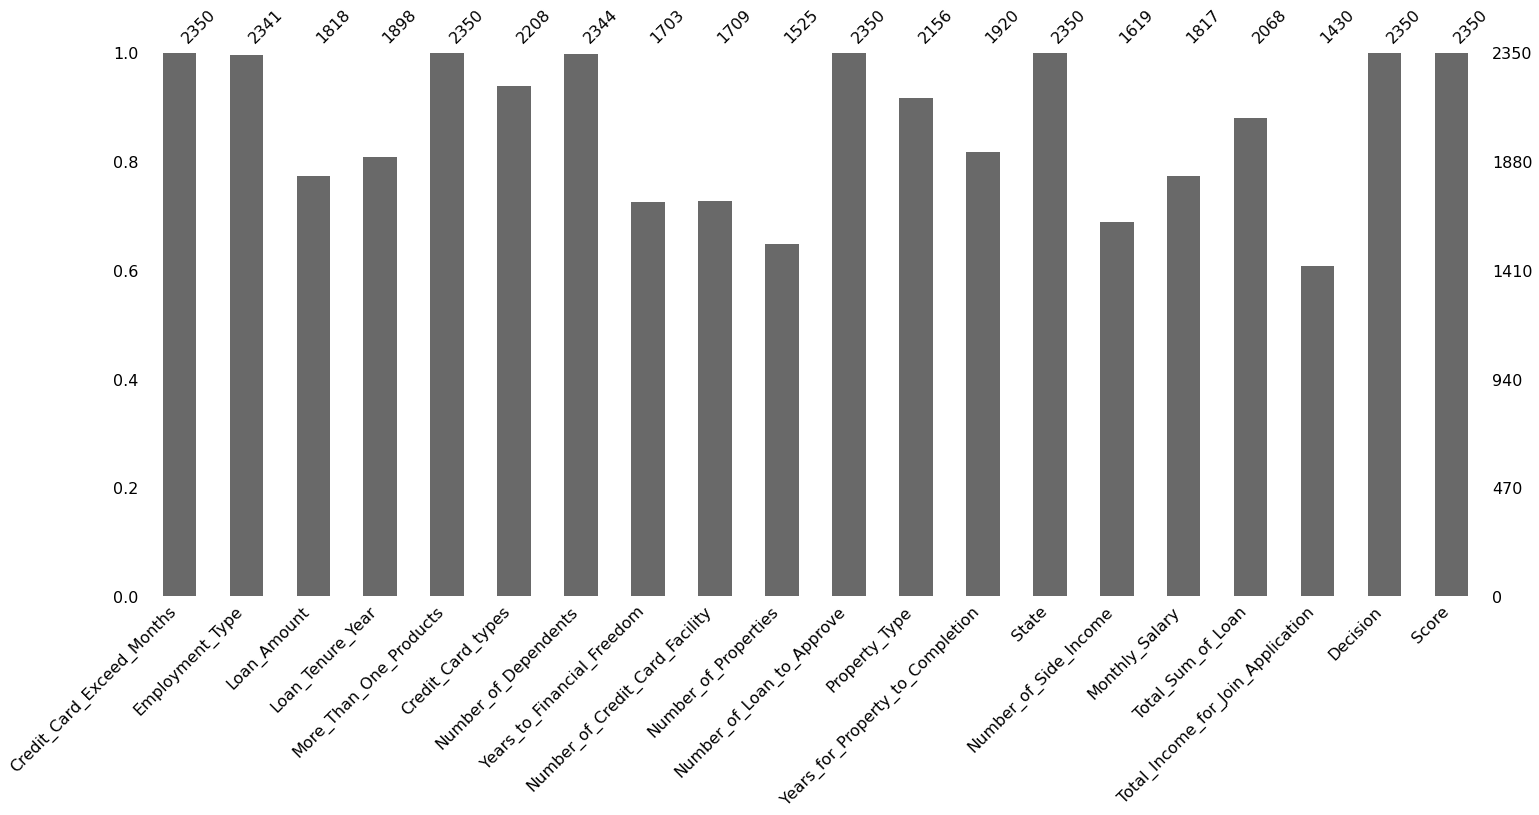

In [28]:
#check missing values
df1.isnull().sum()
msno.bar(df1)

The bar chart above shows that not all values are the same, so in order to proceed, we will need to fill those missing values with mode
`(the highest value among all other values)`.

In [29]:
#Fill all missing values with mode
for column in df1.columns:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

<AxesSubplot:>

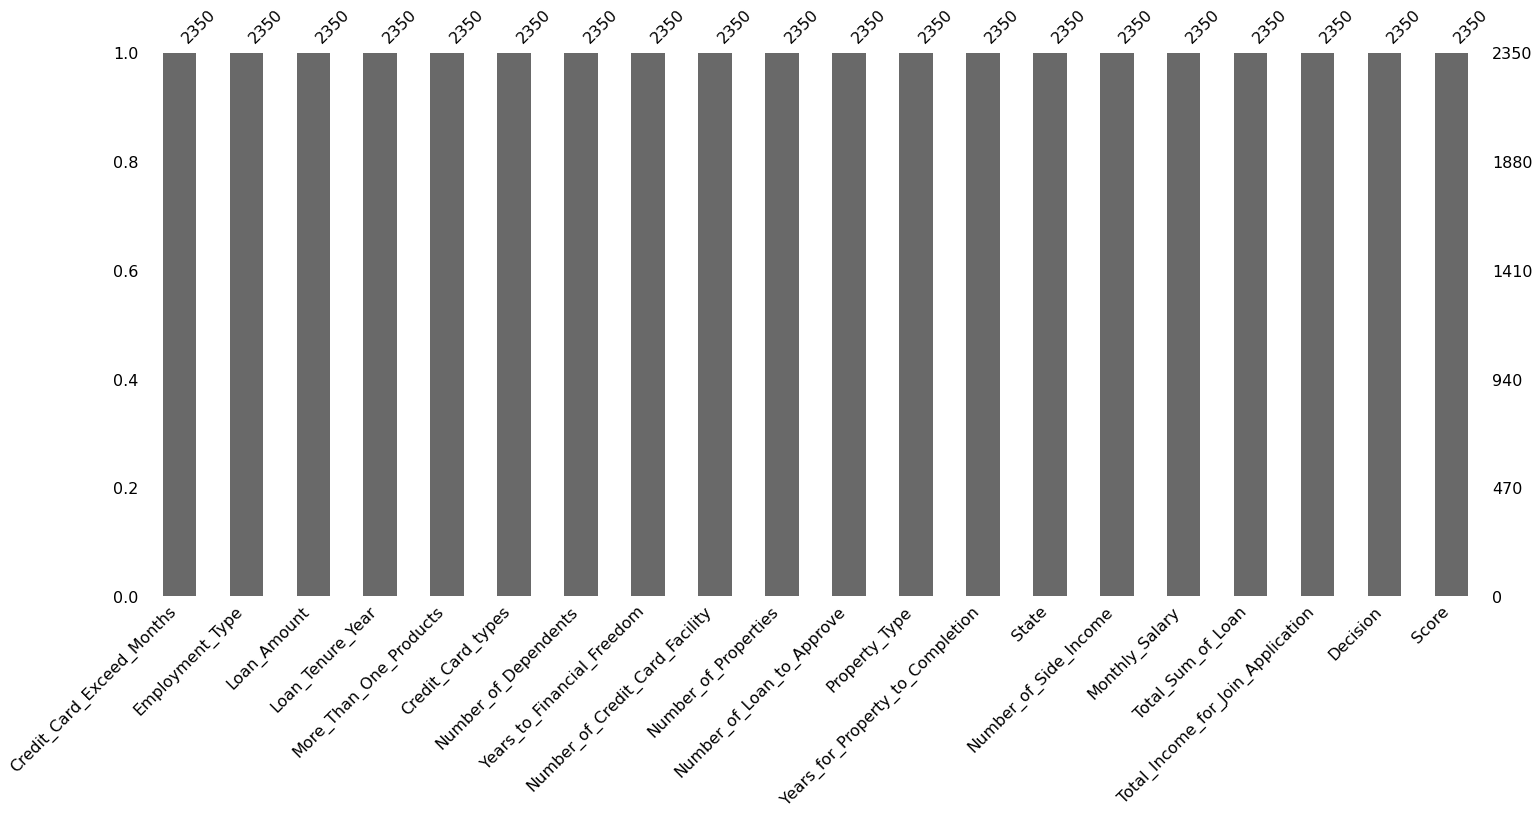

In [30]:
#check missing values again
df1.isnull().sum()
msno.bar(df1)

In [31]:
df1.dtypes

Credit_Card_Exceed_Months              int64
Employment_Type                       object
Loan_Amount                          float64
Loan_Tenure_Year                     float64
More_Than_One_Products                object
Credit_Card_types                     object
Number_of_Dependents                 float64
Years_to_Financial_Freedom           float64
Number_of_Credit_Card_Facility       float64
Number_of_Properties                 float64
Number_of_Loan_to_Approve              int64
Property_Type                         object
Years_for_Property_to_Completion     float64
State                                 object
Number_of_Side_Income                float64
Monthly_Salary                       float64
Total_Sum_of_Loan                    float64
Total_Income_for_Join_Application    float64
Decision                              object
Score                                  int64
dtype: object

##### Step 2: Dealing With Noisy Data.

In [32]:
# Employment_Type
df1.Employment_Type = df1.Employment_Type.replace("employer", "Employer", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("Self_Employed", "Self Employed", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("government", "Government", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("employee", "Employee", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("Fresh_Graduate", "Fresh Graduate", regex=True)

In [33]:
#Duplicate the dataframe again for replacing dtype
df2 = df1.copy()

In [34]:
# Change Loan_Amount to Categorical DType
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(100000.0,300000.0), '100000-300000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(300000.0,500000.0), '300000-500000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(500000.0,700000.0), '500000-700000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(700000.0,900000.0), '700000-900000', df2['Loan_Amount'])
df2['Loan_Amount'] = df2['Loan_Amount'].astype("category")

# Change Loan_Amount to Categorical DType
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'] < 4000.0, '<4000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(4000.0,7000.0), '4000-7000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(7000.0,10000.0), '7000-10000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(10000.0,13000.0), '10000-13000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = df2['Monthly_Salary'].astype("category")

In [35]:
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


In [36]:
df1.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,Employer,694633.0,16.0,yes,platinum,2.0,5.0,2.0,2.0,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,Employer,605505.0,19.0,no,normal,2.0,15.0,2.0,2.0,2,condominium,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,Employer,694633.0,22.0,yes,normal,2.0,5.0,2.0,2.0,3,condominium,10.0,Johor,3.0,4919.0,540489.0,12613.0,Reject,8
3,1,Employer,490216.0,22.0,no,normal,2.0,5.0,4.0,2.0,1,condominium,10.0,Johor,3.0,4459.0,536727.0,10952.0,Accept,9
4,1,Employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,3.0,5628.0,774695.0,9532.0,Reject,8


In [16]:
df2

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,Employer,500000-700000,16.0,yes,platinum,2.0,5.0,2.0,2.0,1,condominium,10.0,Johor,2.0,10000-13000,853141.0,16025.0,Reject,7
1,1,Employer,500000-700000,19.0,no,normal,2.0,15.0,2.0,2.0,2,condominium,10.0,Johor,2.0,7000-10000,882901.0,17082.0,Accept,9
2,1,Employer,500000-700000,22.0,yes,normal,2.0,5.0,2.0,2.0,3,condominium,10.0,Johor,3.0,4000-7000,540489.0,12613.0,Reject,8
3,1,Employer,300000-500000,22.0,no,normal,2.0,5.0,4.0,2.0,1,condominium,10.0,Johor,3.0,4000-7000,536727.0,10952.0,Accept,9
4,1,Employer,100000-300000,14.0,yes,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,3.0,4000-7000,774695.0,9532.0,Reject,8
5,1,Employer,100000-300000,22.0,no,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,2.0,10000-13000,1350187.0,16349.0,Reject,7
6,1,Employer,100000-300000,22.0,yes,gold,2.0,5.0,4.0,2.0,1,condominium,10.0,Johor,3.0,4000-7000,615986.0,11172.0,Accept,7
7,1,Employer,500000-700000,21.0,no,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,3.0,4000-7000,1128574.0,7543.0,Reject,8
8,1,Employer,100000-300000,24.0,yes,normal,2.0,5.0,2.0,2.0,2,condominium,10.0,Johor,3.0,10000-13000,556822.0,12947.0,Accept,8
9,1,Employer,500000-700000,12.0,no,gold,2.0,5.0,2.0,2.0,1,condominium,10.0,Johor,2.0,4000-7000,1155848.0,18385.0,Reject,7


##### Step 3: Handling Highly Correlated Features.

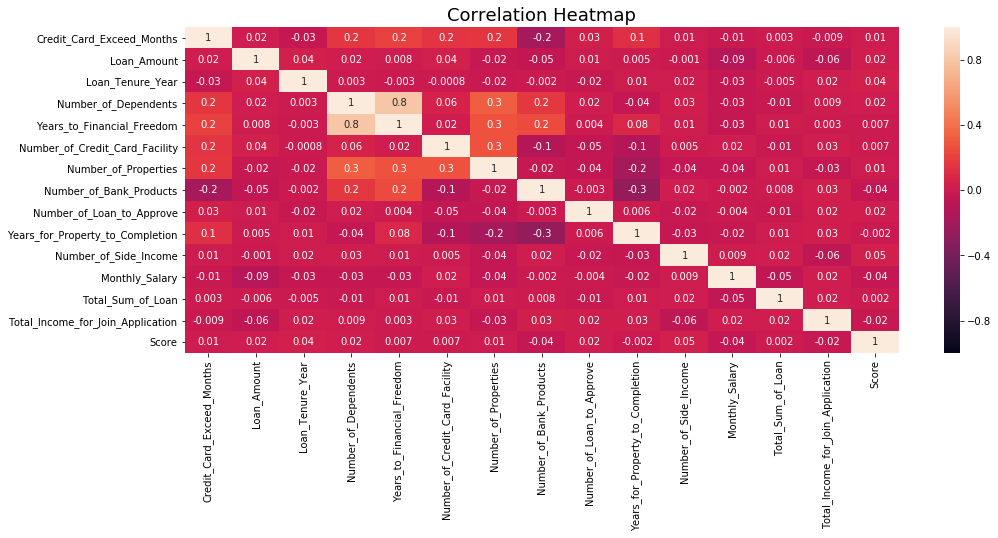

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, fmt='.1g')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});

Based on the Correlation Heatmap above, no correlated values are higher than 99%.

##### Step 3: Handling Low-Variance Features.

In [4]:
df1.var()

Credit_Card_Exceed_Months            4.414735e+00
Loan_Amount                          4.095150e+10
Loan_Tenure_Year                     1.884078e+01
Number_of_Dependents                 1.986365e+00
Years_to_Financial_Freedom           1.666876e+01
Number_of_Credit_Card_Facility       1.892878e+00
Number_of_Properties                 6.616514e-01
Number_of_Bank_Products              2.364637e+00
Number_of_Loan_to_Approve            6.670270e-01
Years_for_Property_to_Completion     1.150530e+00
Number_of_Side_Income                6.726374e-01
Monthly_Salary                       6.786466e+06
Total_Sum_of_Loan                    8.596682e+10
Total_Income_for_Join_Application    1.317901e+07
Score                                1.237749e+00
dtype: float64

Since we have many features to take into consideration, we decided to remove `Years_for_Property_to_Completion` because the variance value is the lowest among all other features.

In [4]:
df2 = df1.drop(columns=['Years_for_Property_to_Completion'])
df2.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,1.0,1,condominium,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,1.0,2,NaN,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,NaN,3,condominium,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,1.0,1,condominium,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,1.0,2,condominium,Johor,3.0,5628.0,774695.0,NaN,Reject,8


##### Step 5: Handling Imbalanced Data

In [8]:
seed = 100
k = 1

pd.read_csv('Bank_CS.csv', encoding='utf-8', engine='python')
X = df2.loc[:, df2.columns != 'label']
y = df2.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df2 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df2.columns = ['feature_1', 'feature_2', 'label']
#df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

AttributeError: 'DataFrame' object has no attribute 'label'